In [9]:
import PIL
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
from os.path import basename
from tqdm.notebook import tqdm

In [10]:
images = glob.glob("raw_images/*.jpg")
tmp = {}
for image in images:
    tmp[int(basename(image.replace('.jpg','')))] = image
images = tmp

In [11]:
images

{2017: 'raw_images/2017.jpg',
 2016: 'raw_images/2016.jpg',
 2014: 'raw_images/2014.jpg',
 2011: 'raw_images/2011.jpg',
 2013: 'raw_images/2013.jpg',
 2009: 'raw_images/2009.jpg',
 2008: 'raw_images/2008.jpg',
 2018: 'raw_images/2018.jpg'}

In [12]:
num_pairs = 50
sim_width = 3
image_width = 512

In [13]:
paired = []
open_images = {}
for im in images.keys():
    if (im + sim_width) in images:
        paired.append(im)
        if im not in open_images:
            open_images[im] = np.asarray(PIL.Image.open(images[im])).mean(axis=2)
        if im+sim_width not in open_images:
            open_images[im+sim_width] = np.asarray(PIL.Image.open(images[im+sim_width])).mean(axis=2)
paired.sort()

In [120]:
for i in tqdm(range(num_pairs)):
    start_year = paired[random.randrange(0, len(paired))]
    
    flip_x = random.random()
    flip_y = random.random()
    
    first_image = open_images[start_year]
    second_image = open_images[start_year+sim_width]
    
    max_r, max_c = first_image.shape
    
    start_r = random.randrange(0, max_r-image_width)
    start_c = random.randrange(0, max_c-image_width)
    
    pre_chunk = first_image[start_r:start_r+image_width, start_c:start_c+image_width].copy()
    post_chunk = second_image[start_r:start_r+image_width, start_c:start_c+image_width].copy()
    
    if flip_x > 0.5:
        pre_chunk = np.flip(pre_chunk, axis=0)
        post_chunk = np.flip(post_chunk, axis=0)
        
    if flip_y > 0.5:
        pre_chunk = np.flip(pre_chunk, axis=1)
        post_chunk = np.flip(post_chunk, axis=1)
    
    pre_chunk *= (255.0/pre_chunk.max())
    post_chunk *= (255.0/post_chunk.max())
    
    output = np.hstack([pre_chunk, post_chunk])
    output = PIL.Image.fromarray(np.uint8(output))
    output.save("paired_chunks/{}_{}.jpg".format(i, start_year))

In [14]:
num_pairs = 25
sim_width = 3
image_width = 256

In [15]:

open_images = {}
for im in images.keys():
    open_images[im] = np.asarray(PIL.Image.open(images[im])).mean(axis=2)

Image 0


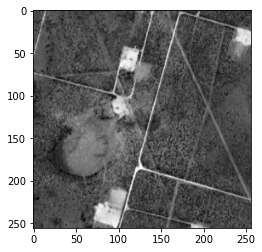

Num wells: 4
Image 1


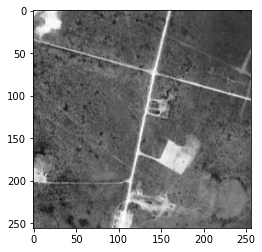

Num wells: 4
Image 2


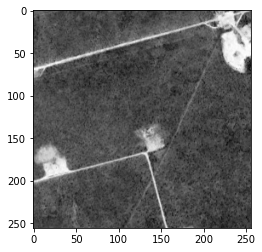

Num wells: 3
Image 3


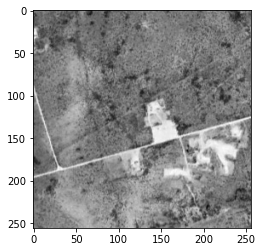

Num wells: 1
Image 4


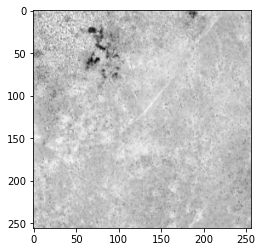

Num wells: 0
Image 5


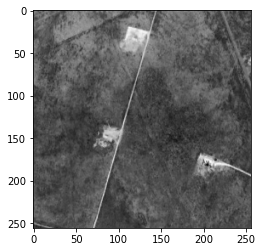

Num wells: 3
Image 6


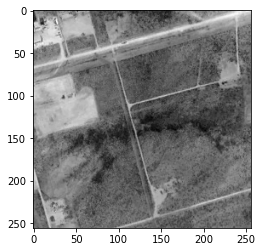

Num wells: 0
Image 7


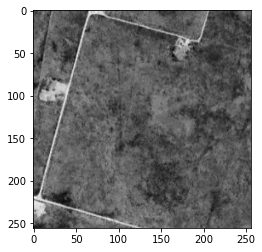

Num wells: 3
Image 8


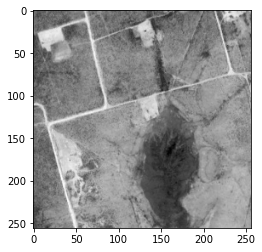

Num wells: 3
Image 9


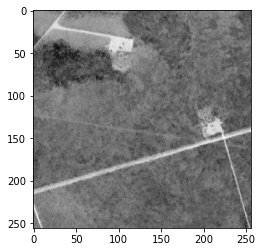

Num wells: 2
Image 10


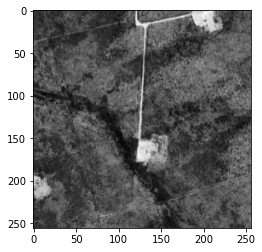

Num wells: 3
Image 11


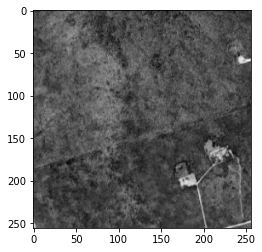

Num wells: 1
Image 12


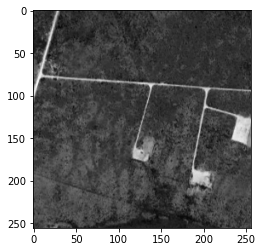

Num wells: 3
Image 13


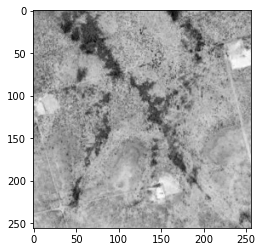

Num wells: 3
Image 14


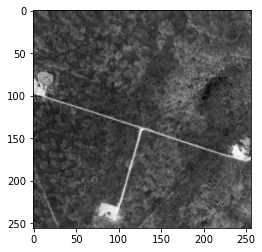

Num wells: 3
Image 15


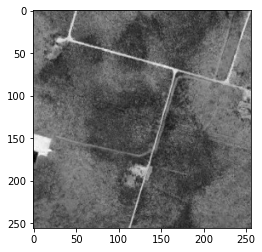

Num wells: 1
Image 16


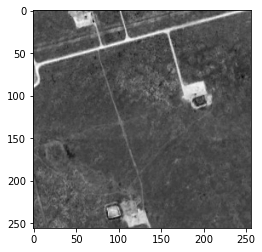

Num wells: 2
Image 17


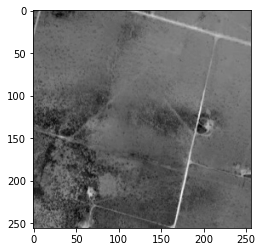

Num wells: 0
Image 18


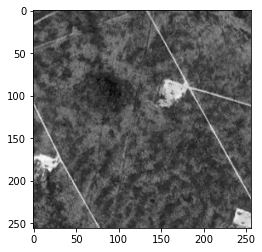

Num wells: 2
Image 19


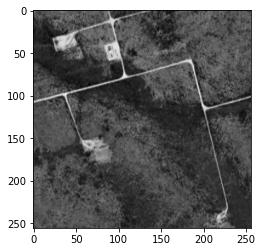

Num wells: 2
Image 20


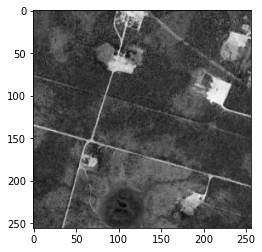

Num wells: 2
Image 21


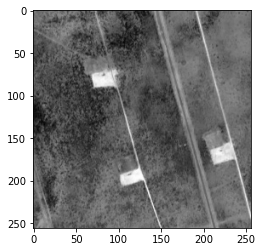

Num wells: 3
Image 22


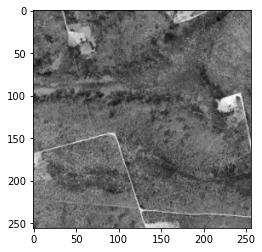

Num wells: 2
Image 23


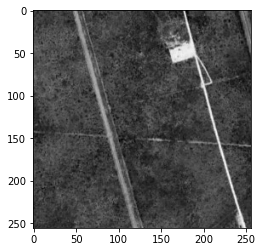

Num wells: 1
Image 24


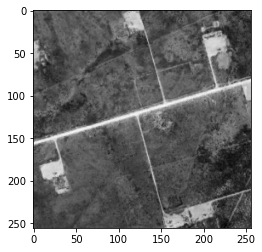

Num wells: 4



In [16]:
for i in tqdm(range(num_pairs)):
    start_year = paired[random.randrange(0, len(paired))]
    
    flip_x = random.random()
    flip_y = random.random()
    
    first_image = open_images[list(open_images.keys())[random.randrange(0, len(open_images))]]
    
    max_r, max_c = first_image.shape
    
    start_r = random.randrange(0, max_r-image_width)
    start_c = random.randrange(0, max_c-image_width)
    
    pre_chunk = first_image[start_r:start_r+image_width, start_c:start_c+image_width].copy()
    
    if flip_x > 0.5:
        pre_chunk = np.flip(pre_chunk, axis=0)
    if flip_y > 0.5:
        pre_chunk = np.flip(pre_chunk, axis=1)
    
    pre_chunk *= (255.0/pre_chunk.max())
    
    output = pre_chunk
    output = PIL.Image.fromarray(np.uint8(output))
    print("Image {}".format(i))
    plt.imshow(output, cmap="gray")
    plt.show()
    num_wells = input("Num wells: ")
    output.save("paired_chunks/{}_{}.jpg".format(i, start_year))
    f = open("paired_chunks/{}_{}.txt".format(i, start_year), "w")
    f.write(str(num_wells))
    f.close()